In [17]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [18]:
# READING DATA
data = pd.read_csv("train.csv")
data.head()
data.shape


(42000, 785)

In [19]:
# DATA PREPROCESSING

data = np.array(data) # changing type to np arrat
m, n = data.shape   # declaring m , n to rows to and columns respectively

np. random.shuffle(data)  # suffle data before splitting into dev and training sets


dev_data = data[0:1000].T  # taking transpose of data
dev_data.shape             
dev_Y = dev_data[0]        # Extrating first row from the data as first row is a label
dev_X = dev_data[1:n]      # Extracting data from row 1 to n
dev_X = dev_X/255          # Normalizing the pixels

data_train = data[1000:m].T # Extracting data from 2000th row to m(exclusive) and taking transpose

Y_train = data_train[0]    # Extracting first row(0th row) from the training data as it has labels 
X_train = data_train[1:n]  # Extacting data from 1th row upto n(exclusive)
X_train = X_train/255      # Normalizing data



In [20]:
# BUILDING THE MODEL

def params():
    #input size = 784, hidden layer sizes = 128, 64, and output size = 10
    W1 = np.random.rand(128, 784) - 0.5  # First layer weights
    b1 = np.random.rand(128, 1) - 0.5    # First layer biases
    W2 = np.random.rand(64, 128) - 0.5   # Second layer weights
    b2 = np.random.rand(64, 1) - 0.5     # Second layer biases
    W3 = np.random.rand(10, 64) - 0.5    # Output layer weights
    b3 = np.random.rand(10, 1) - 0.5     # Output layer biases
    return W1, b1, W2, b2, W3, b3

# Forward propagation
def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1  
    A1 = ReLU(Z1)        
    Z2 = W2.dot(A1) + b2 
    A2 = ReLU(Z2)        
    Z3 = W3.dot(A2) + b3 
    A3 = softmax(Z3)     
    return Z1, A1, Z2, A2, Z3, A3


# back propagation
def ReLU_derrivative(Z):
    return Z > 0

def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size)) 
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y


def back_propag(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot_encoding(Y)  
    dZ3 = A3 - one_hot_Y             
    dW3 = 1 / X.shape[1] * dZ3.dot(A2.T)  
    db3 = 1 / X.shape[1] * np.sum(dZ3, axis=1, keepdims=True)  
    dZ2 = W3.T.dot(dZ3) * ReLU_derrivative(Z2)  
    dW2 = 1 / X.shape[1] * dZ2.dot(A1.T)  
    db2 = 1 / X.shape[1] * np.sum(dZ2, axis=1, keepdims=True)  
    dZ1 = W2.T.dot(dZ2) * ReLU_derrivative(Z1)  
    dW1 = 1 / X.shape[1] * dZ1.dot(X.T)  
    db1 = 1 / X.shape[1] * np.sum(dZ1, axis=1, keepdims=True)  
    return dW1, db1, dW2, db2, dW3, db3



# updating parameters
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alfa):
    W1 -= alfa * dW1  
    b1 -= alfa * db1  
    W2 -= alfa * dW2  
    b2 -= alfa * db2  
    W3 -= alfa * dW3  
    b3 -= alfa * db3 
    return W1, b1, W2, b2, W3, b3










In [21]:
def get_predictions(A3):
    return np.argmax(A3, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y) * 100




def gradient_descent(X, Y, alfa, iterations):
    np.random.seed(42)
    W1 = np.random.rand(64, 784) - 0.5
    b1 = np.random.rand(64, 1) - 0.5
    W2 = np.random.rand(64, 64) - 0.5
    b2 = np.random.rand(64, 1) - 0.5
    W3 = np.random.rand(10, 64) - 0.5
    b3 = np.random.rand(10, 1) - 0.5

    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = back_propag(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alfa)

        if i % 10 == 0:
            predictions = get_predictions(A3)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy = {accuracy:.2f}%")

    return W1, b1, W2, b2, W3, b3



In [22]:
W1, b1, W2, b2, W3, b3 = gradient_descent( X_train, Y_train, 0.10, 400)

Iteration 0: Accuracy = 7.05%
Iteration 10: Accuracy = 50.21%
Iteration 20: Accuracy = 64.42%
Iteration 30: Accuracy = 70.70%
Iteration 40: Accuracy = 74.18%
Iteration 50: Accuracy = 76.77%
Iteration 60: Accuracy = 78.55%
Iteration 70: Accuracy = 79.93%
Iteration 80: Accuracy = 81.16%
Iteration 90: Accuracy = 82.09%
Iteration 100: Accuracy = 82.92%
Iteration 110: Accuracy = 83.61%
Iteration 120: Accuracy = 84.25%
Iteration 130: Accuracy = 84.78%
Iteration 140: Accuracy = 85.31%
Iteration 150: Accuracy = 85.75%
Iteration 160: Accuracy = 86.15%
Iteration 170: Accuracy = 86.48%
Iteration 180: Accuracy = 86.89%
Iteration 190: Accuracy = 87.19%
Iteration 200: Accuracy = 87.45%
Iteration 210: Accuracy = 87.70%
Iteration 220: Accuracy = 87.89%
Iteration 230: Accuracy = 88.15%
Iteration 240: Accuracy = 88.36%
Iteration 250: Accuracy = 88.58%
Iteration 260: Accuracy = 88.76%
Iteration 270: Accuracy = 88.98%
Iteration 280: Accuracy = 89.14%
Iteration 290: Accuracy = 89.31%
Iteration 300: Accurac

In [ ]:
# Training accuracy
Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X_train)
final_predictions = get_predictions(A3)
final_accuracy = get_accuracy(final_predictions, Y_train)

print("\nFinal Training Accuracy: {:.2f}%".format(final_accuracy))



Final Training Accuracy: 90.79%


In [ ]:
# Dev Accuracy
Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, dev_X)
dev_predictions = get_predictions(A3)
dev_accuracy = get_accuracy(dev_predictions, dev_Y)

print("Dev Set Accuracy: {:.2f}%".format(dev_accuracy))


Dev Set Accuracy: 89.40%


In [25]:
# Testing the model different images 
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [9]
Label:  9


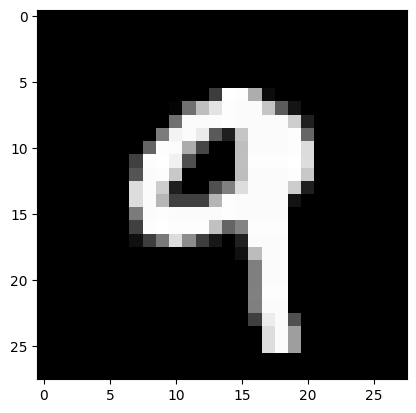

Prediction:  [3]
Label:  3


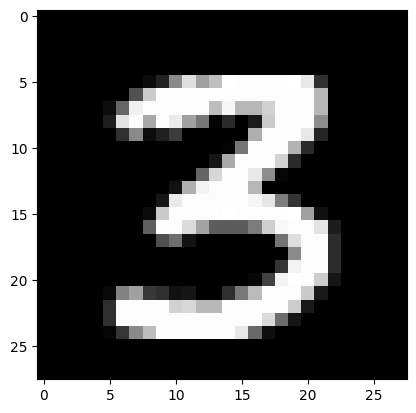

Prediction:  [0]
Label:  0


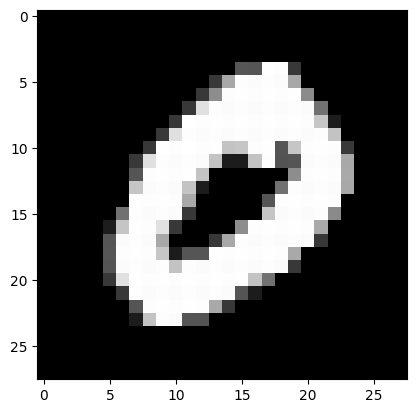

Prediction:  [4]
Label:  4


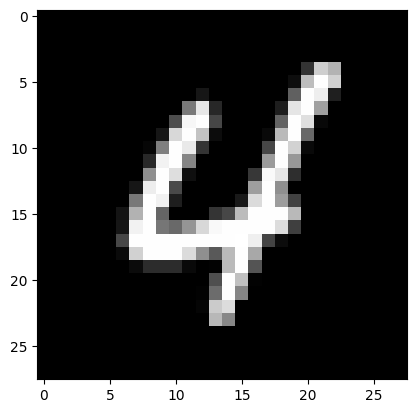

Prediction:  [8]
Label:  8


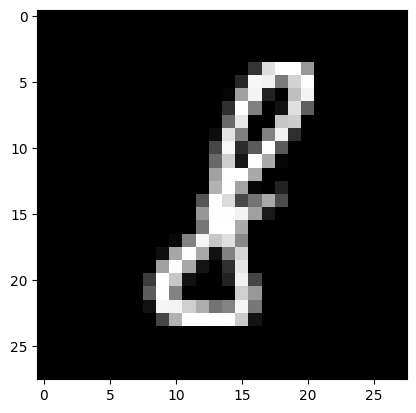

In [26]:
test_prediction(145, W1, b1, W2, b2, W3, b3)
test_prediction(556, W1, b1, W2, b2, W3, b3)
test_prediction(223, W1, b1, W2, b2, W3, b3)
test_prediction(167, W1, b1, W2, b2, W3, b3)
test_prediction(630, W1, b1, W2, b2, W3, b3)